# Model Building

We train multiple machine learning models and evaluate their performance with a comparision between them.

In [18]:
# Modules for data handling and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modules for machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

# Modules for model evaluation
from sklearn import metrics

# Reading the train dataset

In [3]:
train = pd.read_csv("../data/csv/train.csv")

In [23]:
train.pop("Unnamed: 0")

0         8787
1         6030
2        12984
3        13021
4        14982
         ...  
11959     9225
11960    13123
11961     9845
11962    10799
11963     2732
Name: Unnamed: 0, Length: 11964, dtype: int64

In [8]:
y_train = train.pop("cellType")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11964 entries, 0 to 11963
Columns: 7227 entries, Unnamed: 0 to cellType
dtypes: float64(7225), int64(2)
memory usage: 659.7 MB


# Reading the test dataset

In [4]:
test = pd.read_csv("../data/csv/test.csv")

In [26]:
test.pop("Unnamed: 0")

0        3740
1         971
2        9295
3       12592
4        7710
        ...  
5123     1593
5124     6969
5125    15976
5126     2379
5127    11289
Name: Unnamed: 0, Length: 5128, dtype: int64

In [9]:
y_test = test.pop("cellType")

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5128 entries, 0 to 5127
Columns: 7227 entries, Unnamed: 0 to cellType
dtypes: float64(7225), int64(2)
memory usage: 282.7 MB


# K-Nearest Neigbhours

In [ ]:
components = []

In [27]:
def KNN(k):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(train, y_train)
 return knn.score(test,y_test),knn.score(train,y_train)

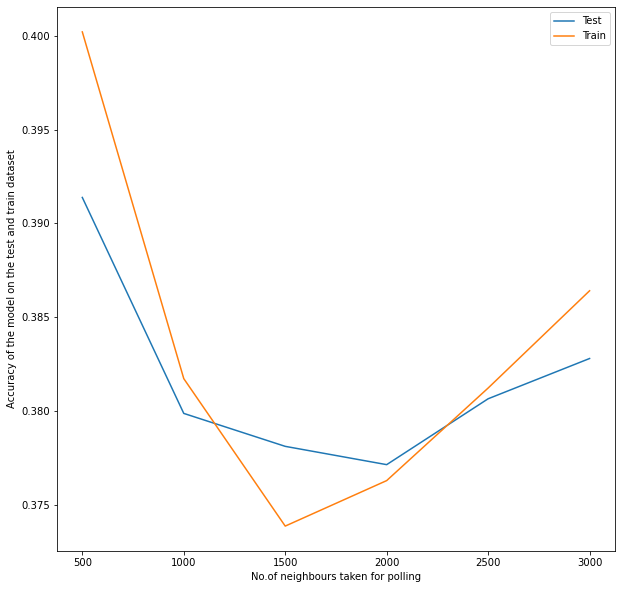

In [30]:
accuracies_test = []
accuracies_train = []
for i in range(500,3001,500): 
  accuracies_test.append(KNN(i)[0])
  accuracies_train.append(KNN(i)[1])
plt.figure(figsize=(10,10))
plt.plot(range(500,3001,500),accuracies_test)
plt.plot(range(500,3001,500),accuracies_train)
plt.xlabel("No.of neighbours taken for polling")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(['Test','Train'])
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [29]:
KNN(2000)

(0.37714508580343215, 0.3762955533266466)

In [25]:
score_lr=cross_val_score(knn, train,y_train,cv=6)
print(score_lr)
print("Avg :",np.average(score_lr))

C:\Users\mitug\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=6.
  warnings.warn(("The least populated class in y has only %d"


[0.388666   0.39017051 0.39618857 0.39819458 0.38766299 0.39217653]
Avg : 0.3921765295887663


# Decision Tree

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

# Multilayer Perceptron

# Random Forest

# Extra Trees